# Introduction to Artificial Neural Networks: Multi-layer perceptron
___
![NN](resources/real_neurons.jpeg)

## Agenda
1. Neuroscience 101
2. Binary Logistic Regression Recap
3. Extending Binary Logistic Regression to shallow artificial neural network
4. Deep Artificial Neural Networks
5. Backpropagation
6. Implementation

# 1. Connection to Neuroscience

![Neuron](resources/neuron.png)
(Figure from https://www.researchgate.net/figure/The-structure-of-a-real-neuron_fig1_266485234)

# 2. Refresher: Logistic Regression

#### Remember this model ?
---

The ***model***: $\hat{y_{i}} = \sigma(w_0+w_1 x^{1}_i+...+w_d x^{d}_i)  = \sigma(\mathbf{w^Tx_{i}})$

$\hat{y_{i}}$: predicted value for data point $\mathbf x_{i}$

$\mathbf x_i = \begin{bmatrix} 1 \\ x^{1}_i  \\ ... \\ x^{d}_i \end{bmatrix}$: feature vector of data point $i$. $x^{j}_{i}$: feature $j$ of training data point $i$ - ***given***

$\mathbf w = \begin{bmatrix} w_0  \\ ... \\ w_{d} \end{bmatrix}$: weight vector - ***trainable***
with 

$\sigma:\mathbb{R}\rightarrow ]0,1[$, $x\mapsto\frac{1}{1+e^{-x}}=\frac{e^x}{1+e^{x}}$

## A graphical look on Logistic Regression

![LogR](resources/lr.png)

- where $f(o)=\sigma(o)$

### Output:
#### 1. Weighted sum:
$o=w_0+\sum_{i=1}^{d}w_ix_{i}$.
#### 2. Nonlinear activation, e.g. sigmoid function: $f(o)=\sigma(o)=\frac{1}{1+\exp(-o)}$, where $o=\mathbf w^T \mathbf x$
"How likely does the data point $\mathbf{x}$ belong to class 1?".

# 3. From Binary Logistic Regression to Multiclass-Logistic Regression - Shallow neural network
___

#### Back to our model
![m-classification](resources/shnn.png)

### Output layer:
#### 1. Weighted sum:
$o_i=\sum_{j=1}^{n}x_jw_{ij}$.
#### 2. Nonlinear activation + normalization via Softmax function, $s:=softmax()$:
$z_i = softmax(o_i)=p(y_i|\mathbf{x})=\frac{\exp(o_i)}{\sum_{j=1}^{m}\exp(o_j)}$. "How likely does the data point $\mathbf{x}$ belong to class $y_i$?"

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets 

In [4]:
### example
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

x = np.array([1.2, 0.01, 2.1])
output_probs = softmax(x)

print(f'Unnormalized model outputs: \n{x}\n')
print(f'Normalized model outputs: \n{output_probs}\n')
print(f'Sum of normalized outputs: \n{output_probs.sum()}\n')

Unnormalized model outputs: 
[1.2  0.01 2.1 ]

Normalized model outputs: 
[0.26568721 0.0808277  0.65348509]

Sum of normalized outputs: 
1.0



### Prediction
- The index of the neuron with the highest value corresponds to the predicted label. In the example code above this would be class with index 2, the last entry in the array

## 4. Deep Neural Network
___

![nn](resources/nn.png)

### Hidden Layer:
#### 1. Weighted sum:
$z_i=\sum_{j=1}^{n}x_jw_{ji}$.
#### 2. Nonlinear activation, e.g. via sigmoid function, $f(x)=sigmoid(x)=\sigma(z_i)=\frac{1}{1+\exp(-z_i)}$.

### Output layer:
#### 1. Weighted sum:
$z_i=\sum_{j=1}^{n}x_jw_{ji}$.
#### 2. Nonlinear activation + normalization via Softmax function, $s():=softmax()$:
$softmax(z_i)=p(y_i|\mathbf{x})=\frac{\exp(z_i)}{\sum_{j=1}^{m}\exp(z_j)}$. "How likely does the data point $\mathbf{x}$ belongs to class $y_i$?"

### Prediction
- The index of the neuron with the highest value corresponds to the predicted label. In the example code above this would be class with index 2, the last entry in the array

## Representing layers as matrices:
![](resources/matrices.png)

## Veeeery deep networks and their feature representation
![](resources/dnn_features.png)

## Why use non-linearities ?
![](resources/lin_vs_nonlin.png)

### Types of non-linearites and the linear function
![](resources/non_linearities.png)

# 5. Training Neural Networks via Backpropagation algorithm

### Backpropagation algorithm outline:
#### 1. Forward pass:
    1.1 Compute model output
    1.2 Evaluate the loss

#### 2. Backward pass:
    2.1 Compute gradients wrt. each weight via chain-rule
    2.2 Apply gradient descent or any other optimization algorithm in order to update weights correspondingly

### 1.1 Compute model output:
Simply multiply input features layer by layer until output layer is evaluated

### 1.2 Evaluate the loss:
- A suitable and often used loss function for classification and softmax outputs is the negative log likelihood. For a dataset with n data points, it looks as follows:
$loss(\mathbf w)=J(\mathbf w)=NLL(\mathbf w)=-\sum_{i=1}^{N}\log(\hat{y_i}^j)$, where $\hat{y_i}^j$ is the softmax value, or our models prediction for the input i belonging assigned to class j, when the true label is of class j. So if the label is 2, and the output value of our model at index 1, we have $-\log(1)=0$, or loss of zero -> model does perfect prediction. The closer this value gets to zero, the higher our loss gets. See negative log function below for clarification.

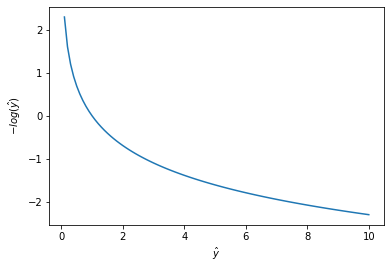

In [5]:
#example
x = np.linspace(0.1,10,100)
plt.plot(x, -np.log(x))
plt.xlabel("$\hat{y}$")
plt.ylabel("$-log(\hat{y})$");

### 2.1 Computing gradients via chain-rule:
#### Chain rule: 
Let $f(z)$ be a function that takes x as an argument, and $z:=g(x)$ be a function itself that depends on the variable $x$.
The derivative of f with respect to x gets computed as follows: $\frac{\partial f(z)}{\partial x}=\frac{\partial f}{\partial z}\frac{\partial z}{\partial x}$.

#### Applied chain-rule
![chain rule](resources/chain_rule.png)

### Chain rule in backpropagation:
![backprop](resources/backpropa.png)

### 2.2 Apply weight updates via Stochastic Gradient Descent
- Update each weight value $\mathbf w$ as follows:
$\mathbf w^{t+1}=\mathbf w^{t}-\alpha\nabla_{\mathbf w}J_B(\mathbf w^t)$, where $B\subseteq D$ and $J_B(\mathbf w^t)=-\frac{1}{N_B}\sum_{i=1}^{B}\log(\hat{y_i})$, and $N_B$ is the number of data points in $B$.

#### Gradient Descent:
---
- Update each weight value $\mathbf w$ as follows:
$\mathbf w^{t+1}=\mathbf w^{t}-\alpha\nabla_{\mathbf w}J(\mathbf w^t)$, $J(\mathbf w^t)$

#### Stochastic Gradient Descent:
---
- Update each weight value $\mathbf w$ as follows:
For each batch $B\subseteq D$, do:
- $\mathbf w^{t+1}=\mathbf w^{t}-\alpha\nabla_{\mathbf w}J_B(\mathbf w^t)$

### 2.3 Stochastic Gradient Descent vs. Gradient Descent
![](resources/sgd.png)
Source: https://www.researchgate.net/figure/Stochastic-gradient-descent-compared-with-gradient-descent_fig3_328106221

## Trick for better convergence: 
Decrease the learning rate over epochs, e.g. $\alpha^{t+1} = \frac{\alpha^1}{1+\gamma n}$, where $n$ is the current epoch, $\gamma$ is a decay parameter. 

# 6. PyTorch implementation

### 0. Do the imports

In [95]:
import torch
import torchvision 

### 1. Load and preprocess the data
PyTorch Neural Networks can only work on Torch-Tensor objects. These tensors need to be provided to the neural network in the following way:

1. Create a PyTorch Dataset object
2. Create a PyTorch Dataloader object

Look up these resources on the topic:
- https://pytorch.org/docs/stable/data.html
- https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html

In [96]:
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_set = torchvision.datasets.FashionMNIST("./data", download=True, train=True, transform=transforms)
test_set = torchvision.datasets.FashionMNIST("./data", download=False, train=False, transform=transforms)

# DataLoader: Special PyTorch object that feeds the PyTorch Neural Network with data 
batch_size = 32
trainloader = torch.utils.data.DataLoader(train_set, 
                                          batch_size=batch_size, shuffle=True)

testloader = torch.utils.data.DataLoader(test_set, 
                                         batch_size=batch_size, shuffle=True)

class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [98]:
type(train_set)

torchvision.datasets.mnist.FashionMNIST

In [100]:
testloader

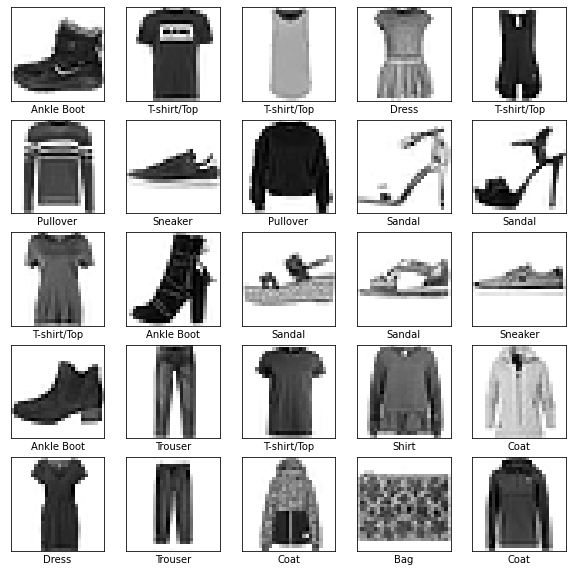

In [101]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(train_set.data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_set.targets[i]])
plt.show()

In [102]:
train_set.data.shape

torch.Size([60000, 28, 28])

In [104]:
train_set.targets.shape

torch.Size([60000])

### Creating PyTorch dataset from NumPy dataset
More info on the PyTorch data API and how to create custom Dataset classes: 
- https://pytorch.org/docs/stable/data.html
- https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html

In [113]:
numpy_data = train_set.data.numpy()
numpy_targets = train_set.targets.numpy()

In [114]:
numpy_targets

array([9, 0, 0, ..., 3, 0, 5], dtype=int64)

In [115]:
type(numpy_data), type(numpy_targets)

(numpy.ndarray, numpy.ndarray)

### Use custom dataset in PyTorch 
1. Convert numpy arrays to PyTorch tensors
2. Use Pytorch's Dataset classes, e.g. TensorDataset class: https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset
3. Create a PyTorch dataloader object using the PyTorch dataset object:
https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

In [116]:
# Convert numpy arrays to torch tensors. Target tensor should be of type Long!
X_tensor = torch.Tensor(numpy_data)
y_tensor = torch.LongTensor(numpy_targets)

In [117]:
y_tensor

tensor([9, 0, 0,  ..., 3, 0, 5])

In [118]:
X_tensor.shape, y_tensor.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [119]:
# Create a PyTorch TensorDataset object
dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)

In [120]:
# 3. Create a PyTorch dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

### 2. Implement the model
There are two main ways to implement a Neural Network in PyTorch:
1. Using the torch.nn.Sequential class
2. Implementing a class and creating an object of it(done in homework)

In [105]:
print(28*28)

784


In [123]:
# Way 1: Straight Forward
model = torch.nn.Sequential(
                
                # Input layer of size 784
                torch.nn.Flatten(),
    
                # 1st linear layer
                torch.nn.Linear(in_features=28*28, out_features=256),
    
                # Nonlinearity
                torch.nn.Sigmoid(),
    
                # 2nd linear layer
                torch.nn.Linear(in_features=256, out_features=10)
    
                )

In [108]:
model

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

### 3. Train the model

In [109]:
len(trainloader)

1875

In [110]:
# 1. Define Loss function, and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [121]:
# 2. Implement the training loop
epochs = 5
for epoch in range(epochs):
    
    # Training statistic that tracks progress
    running_loss = 0.0
    
    for i, (imgs, labels) in enumerate(dataloader):
        
        # zeor the parameter gradients of last loop
        optimizer.zero_grad()
        
        # Logits are essentially the predictions before converting them to probability scores(e.g. through SoftMax)
        logits = model(imgs)
        loss = loss_fn(logits, labels)
        
        # Compute Gradients
        loss.backward()
        
        # Apply Gradient Descent
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        
        if i % 500 == 499:
            print(f'Epoch: {epoch}, batch: {i}, loss: {running_loss / 500}')
            running_loss = 0.0

Epoch: 0, batch: 499, loss: 0.642408911794424
Epoch: 0, batch: 999, loss: 0.594821564912796
Epoch: 0, batch: 1499, loss: 0.6002478902339935
Epoch: 1, batch: 499, loss: 0.5908919292390347
Epoch: 1, batch: 999, loss: 0.5956482154130935
Epoch: 1, batch: 1499, loss: 0.5931520252227783
Epoch: 2, batch: 499, loss: 0.5703051465153695
Epoch: 2, batch: 999, loss: 0.5849234707951546
Epoch: 2, batch: 1499, loss: 0.5575309971272946
Epoch: 3, batch: 499, loss: 0.568095840126276
Epoch: 3, batch: 999, loss: 0.594257200717926
Epoch: 3, batch: 1499, loss: 0.5782410720288753
Epoch: 4, batch: 499, loss: 0.5744208749830723
Epoch: 4, batch: 999, loss: 0.5708097878992557
Epoch: 4, batch: 1499, loss: 0.5914012176394463


### 4. Evaluate the model

In [112]:
# Test loop
# Put model in evaluation mode
model.eval()
total_correct = 0.0

for imgs, labels in testloader: 
    logits =  model(imgs)
    
    # get predictions
    _, preds = logits.max(dim=1)
    
    # Compute sum of correctly classified points for this batch
    correctly_classified = (preds == labels).sum().numpy()
    
    # add number of correctly classified points of this batch to total number
    total_correct += correctly_classified
    
# Compute overall accuracy
test_acc = total_correct / len(testloader.dataset)
 
print(f'Test accuracy : {test_acc*100}%')

Test accuracy : 78.41%
